# Python 3
For this tutorial we'll be using the Iris dataset from sklearn. 

In this notebook we will:
1. Import required modules and dataset
2. Define multiple Classification models
3. Fit the data to our models
4. Use our trained models to predict a class label 
5. Evaluate our models and chose the best performing model 



In [1]:
import pandas as pd



In [2]:
df = pd.read_csv("exports.csv")

print(df.head())



   year country origin country destination  export_val
0  1995        Vietnam                 BFA    67177.77
1  1995        Vietnam                 CAF   514674.15
2  1995        Vietnam                 CIV    58011.71
3  1995        Vietnam                 CMR    97669.00
4  1995        Vietnam                 COG    24018.39


<h1>groupby()</h1>

<ul>
    <li>groupby combines 3 steps all in one function:
        <ol>
            <li>Split a DataFrame</li>
            <li>Apply a function</li>
            <li>Combine the results</li>
        </ol>
    </li>
    <li>groupby must be given the name of the column to group by as a string</li>
    <li>The column to apply the function onto must also be specified, as well as the function to apply</li>
</ul>

In [3]:
country_dest_sum = df.groupby("country destination")\
                    ["export_val"].sum().reset_index()
country_dest_sum.head()


,country destination,export_val
0,AFG,2971037.11
1,AGO,5580441.52
2,ALB,5569879.59
3,AND,1255339.40
4,ARE,26415443.25


In [16]:
country_dest_sum.sort_values(by = "export_val", ascending = False, inplace = True)
country_dest_sum.head()



,country destination,export_val
32,CHN,1.780252e+10
83,JPN,2.546373e+09
101,MEX,1.431131e+09
24,BRA,1.331837e+09
75,IND,1.180218e+09


In [5]:
countries = pd.read_csv("country names - Sheet1.csv")
countries.head()



,id,id_3char,name
0,naabw,abw,Aruba
1,asafg,afg,Afghanistan
2,afago,ago,Angola
3,naaia,aia,Anguilla
4,eualb,alb,Albania


In [6]:
countries["id_3char"] = countries["id_3char"].str.upper()



In [7]:
countries.head()



,id,id_3char,name
0,naabw,ABW,Aruba
1,asafg,AFG,Afghanistan
2,afago,AGO,Angola
3,naaia,AIA,Anguilla
4,eualb,ALB,Albania


In [8]:
countries.columns = ["id", "code", "Name"]



In [9]:
countries.head()



,id,code,Name
0,naabw,ABW,Aruba
1,asafg,AFG,Afghanistan
2,afago,AGO,Angola
3,naaia,AIA,Anguilla
4,eualb,ALB,Albania


<h1>merge()</h1>

<ul>
    <li>Merge two DataFrames along common columns</li>
    <li>Must be provided the DataFrame to merge with, as well as the names of the common columns</li>
    <li>Will merge and map rows where the values in both DataFrames are equal</li>
</ul>

In [10]:
df_merged = df.merge(countries, left_on = "country destination", 
                     right_on = "code")



In [11]:
df_merged.head()



,year,country origin,country destination,export_val,id,code,Name
0,1995,Vietnam,BFA,67177.77,afbfa,BFA,Burkina Faso
1,1996,Vietnam,BFA,141525.02,afbfa,BFA,Burkina Faso
2,1997,Vietnam,BFA,218335.84,afbfa,BFA,Burkina Faso
3,1998,Vietnam,BFA,1498090.16,afbfa,BFA,Burkina Faso
4,1999,Vietnam,BFA,384014.99,afbfa,BFA,Burkina Faso


In [12]:
df_merged.drop(["id", "code"], 1, inplace = True)



In [13]:
df_merged.head()



,year,country origin,country destination,export_val,Name
0,1995,Vietnam,BFA,67177.77,Burkina Faso
1,1996,Vietnam,BFA,141525.02,Burkina Faso
2,1997,Vietnam,BFA,218335.84,Burkina Faso
3,1998,Vietnam,BFA,1498090.16,Burkina Faso
4,1999,Vietnam,BFA,384014.99,Burkina Faso


In [14]:
#1. Downloading, Installing and Starting Python SciPy

# Check the versions of libraries
# scipy
import scipy

# numpy
import numpy

# scikit-learn
import sklearn

#2. Load The Data

#2.1 Import  Libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import datasets

from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [15]:
#2.2 Load Dataset
dataset = datasets.load_iris()
feature_names = dataset.feature_names
iris_data = pd.DataFrame(data=dataset.data, columns=feature_names)
target = pd.DataFrame(data=dataset.target, columns=['class'])

display(dataset)



{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
#3. Summarize The Dataset

#3.1 Dimensions of Dataset

print(iris_data.shape)



(150, 4)


In [20]:
#3.2 Peek at the Data

print(iris_data.head(20))



    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2

In [21]:
#3.3 Statistical Summary

print(iris_data.describe())



       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [22]:
#3.4 Class Distribution

print(target.groupby('class').size())



class
0    50
1    50
2    50
dtype: int64


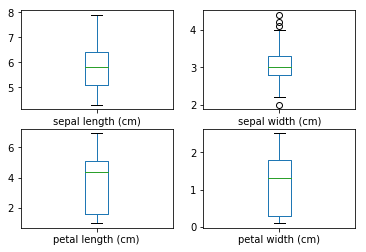

In [23]:
#4. Data Visualization

#4.1 Univariate Plots

# box and whisker plots
iris_data.plot(kind='box', subplots=True, layout=(2,2), 
               sharex=False, sharey=False)
plt.show()



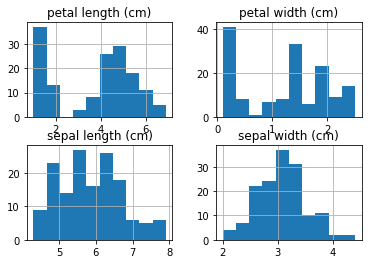

In [24]:
# histograms
iris_data.hist()
plt.show()



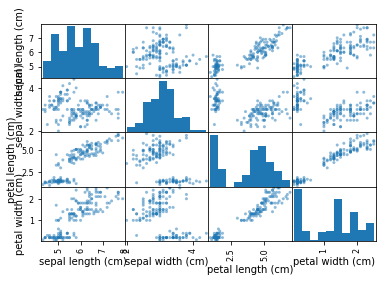

In [25]:
#4.2 Multivariate Plots

# scatter plot matrix
scatter_matrix(iris_data)
plt.show()



In [26]:
#5. Evaluate Some Algorithms

#5.1 Create a Validation Dataset

# Split-out validation dataset
X = iris_data[feature_names].values
Y = target.values
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)



X_validation, X_test, Y_validation, Y_test = model_selection.train_test_split(
    X_validation, Y_validation, test_size=0.5, random_state=seed)


print(X_test.shape)



(15, 4)


In [27]:
models = []
scores = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
    model.fit(X_train, Y_train)
    scores.append((name, model.score(X_validation, Y_validation)))

print(scores)



[('LR', 0.8), ('LDA', 0.9333333333333333), ('KNN', 0.8), ('CART', 0.8), ('NB', 0.6666666666666666), ('SVM', 0.8666666666666667)]


In [28]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
LDA.score(X_test, Y_test)



1.0

In [29]:
display(X_test)
display(Y_test)



array([[5. , 3.5, 1.3, 0.3],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3.1, 5.6, 2.4],
       [5.2, 4.1, 1.5, 0.1],
       [7.2, 3.6, 6.1, 2.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [5.8, 2.7, 5.1, 1.9]])

array([[0],
       [2],
       [1],
       [1],
       [1],
       [0],
       [0],
       [2],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2]])

In [30]:
LDA.predict([[5.4, 3. , 4.5, 1.5]])



array([1])

In [31]:
for point in X_test:
    print(LDA.predict([point]))
    
    

[0]
[2]
[1]
[1]
[1]
[0]
[0]
[2]
[1]
[2]
[0]
[2]
[2]
[2]
[2]


In [32]:
# evaluate each model in turn
results = []
results_mean = []
names = []
scoring = "accuracy"

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, 
                                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_mean.append(cv_results.mean())
    names.append(name)
    msg = f"{name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)



LR, 0.9666666666666666, 0.04082482904638632
LDA, 0.975, 0.03818813079129868
KNN, 0.9833333333333332, 0.03333333333333335
CART, 0.9666666666666666, 0.04082482904638632
NB, 0.975, 0.053359368645273735
SVM, 0.9916666666666666, 0.025000000000000012


C:\Users\MAIN\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


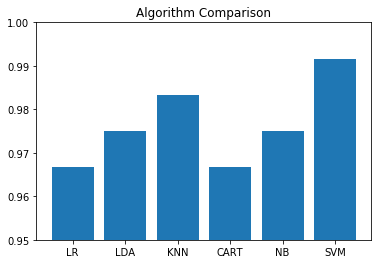

In [33]:
#5.4 Select Best Model

# Compare Algorithms
fig = plt.figure()
plt.title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names,results_mean)
plt.ylim([0.95,1])
ax.set_xticklabels(names)
plt.show()

